# Water waves in a ripple tank

In this example we'll use the Eikonal equation as a high-frequency
approximation of the wave propagation equation, in order to approximately
simulate what happens to water waves in a [ripple
tank](https://en.wikipedia.org/wiki/Ripple_tank#Diffraction), as they pass
through a small opening in an obstacle.

The solution to the Eikonal equation in this case will be the time of first
arrival of the wavefront to any given point in the geometry.

Let us first load the relevant packages

In [1]:
import Pkg                             #hide
Pkg.activate(joinpath(@__DIR__, "..")) #hide
Pkg.resolve(io=devnull)                #hide
using Eikonal
using Plots

  Activating project at `~/projets/Eikonal.jl/docs`


...and define a few parameters for our problem and its discretization:

In [2]:
W = 1.0     # tank width [m]
N = 1000    # number of mesh cells
Δx = W/N    # mesh cell width [m]
w = 1e-2    # obstacle width [m]
s = 1e-2    # opening size [m]
c = 1.0     # waves speed [m/s]
σ₀ = Δx / c # slowness [s]

"Index of the cell in which `x` lies"
idx(x) = max(ceil(Int, x/Δx), 1)

"Positions of mesh vertices"
x = [(i-1)*Δx for i in 1:N+1];

We then fill the slowness matrix, which gives the value of the slowness in
each mesh cell. An infinite slowness is affected to cells containing the
obstacle. Otherwise, the convention used in this package is that the slowness
value is the time it takes for the front to cross a mesh cell.

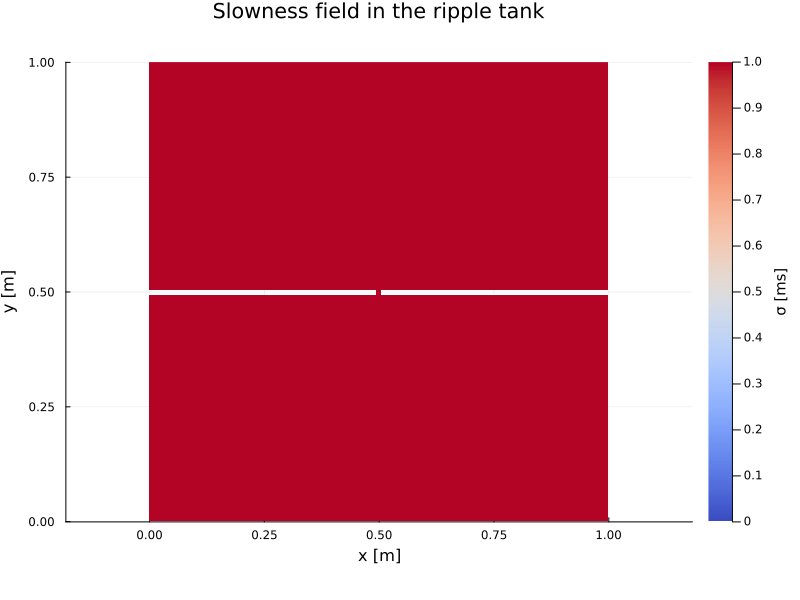

In [3]:
σ = fill(σ₀, N, N) # Ripple tank

w₋ = idx((W-w)/2)  # Obstacle
w₊ = idx((W+w)/2)
σ[w₋:w₊, :] .= Inf

s₋ = idx((W-s)/2)  # Opening
s₊ = idx((W+s)/2)
σ[w₋:w₊, s₋:s₊] .= σ₀

heatmap(x, x, 1000 .* σ, c=:coolwarm,
        title="Slowness field in the ripple tank",
        colorbar_title="σ [ms]",
        xlabel="x [m]", ylabel="y [m]",
        aspect_ratio=1, size=(800, 600))

We can now create an Eikonal solver associated to this slowness matrix:

In [4]:
fs = FastSweeping(σ)

FastSweeping solver on a 1000×1000 grid

The rippler creates a plane wave starting from y=0. For this row of mesh
cells, the first arrival time of the wavefront is initialized to 0.

In [5]:
for j in axes(σ, 2)
    init!(fs, (1, j))
end

We can then solve the Eikonal equation, in order to retrieve the arrival times
of the wavefront everywhere:

iter 1, sweep 1: change = Inf
iter 1, sweep 2: change = Inf
iter 1, sweep 3: change = Inf
iter 1, sweep 4: change = Inf
iter 2, sweep 1: change = 0.17157287525380985
iter 2, sweep 2: change = 0.0
iter 2, sweep 3: change = 0.0019762845849802375
iter 2, sweep 4: change = 0.0017452183935716481
iter 3, sweep 1: change = 0.0
iter 3, sweep 2: change = 0.0
iter 3, sweep 3: change = 0.0


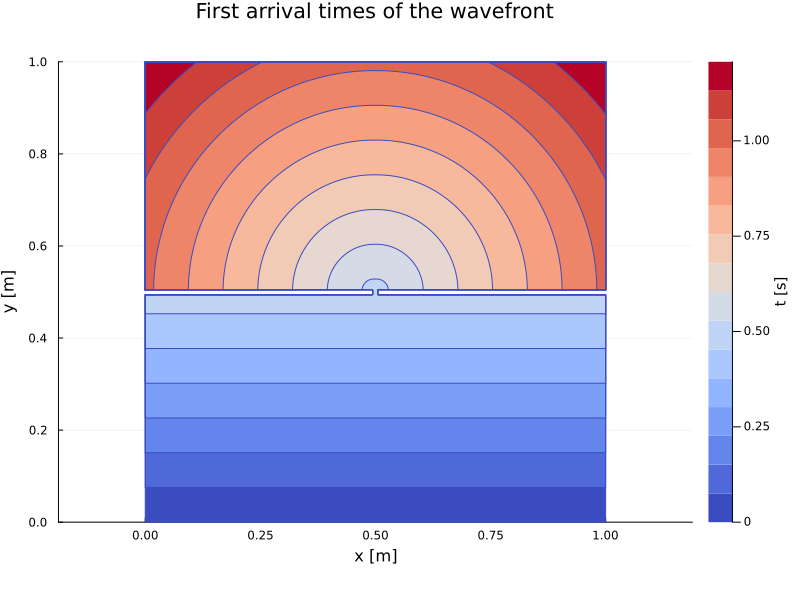

In [6]:
sweep!(fs, verbose=true)

contour(x, x, fs.t, fill=true, c=:coolwarm,
        title="First arrival times of the wavefront",
        xlabel="x [m]", ylabel="y [m]",
        colorbar_title="t [s]",
        aspect_ratio=1, size=(800, 600))

We can see that the Eikonal can correctly simulate the transition from plane
waves to spherical waves through the opening. However, since we only solve for
arrival times of the wave front, all information about the waves amplitude is
lost and we fail to see the existence of a cone outside of which the water is
undisturbed. See for example this [YouTube
video](https://www.youtube.com/watch?v=2hAPoy0tYKk) to look at the real
experiment.

---

*This notebook was generated using [Literate.jl](https://github.com/fredrikekre/Literate.jl).*